
#### AIM: Write a program to perform Chi-square Test statistical test using user defined functions. Use  smoking.CSV dataset data set to perform above tests using user defined functions. Verify the results obtained  with standard functions.

In [ ]:
import pandas as pd

data = pd.read_csv('smoking.csv')
data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['smoking'])

# Calculate the observed values
observed = contingency_table.values

# Calculate expected values (assuming null hypothesis of independence)
n = observed.sum()
expected = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / n

# Calculate the Chi-square statistic
chi2_statistic = np.sum((observed - expected) ** 2 / expected)

# Calculate degrees of freedom
dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

# Find the critical value for a chosen significance level (e.g., 0.05)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Calculate the p-value using the survival function (sf) of chi-squared distribution
p_value = chi2.sf(chi2_statistic, dof)

# Determine whether to accept or reject the null hypothesis
if chi2_statistic > critical_value:
    result = "Reject the null hypothesis (There is a significant relationship)"
else:
    result = "Accept the null hypothesis (No significant relationship)"

# Print the results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"Degrees of freedom: {dof}")
print(f"Critical value: {critical_value}")
print(f"P-value: {p_value}")
print(f"Result: {result}")

Chi-square statistic: 14504.790620958138
Degrees of freedom: 1
Critical value: 3.841458820694124
P-value: 0.0
Result: Reject the null hypothesis (There is a significant relationship)


If the p-value is coming out as 0, it suggests an extremely low p-value, indicating a strong rejection of the null hypothesis. This typically means that there is a significant relationship between the 'gender' and 'smoking' variables.

To verify this relationship, let us plot a suitable visualization.

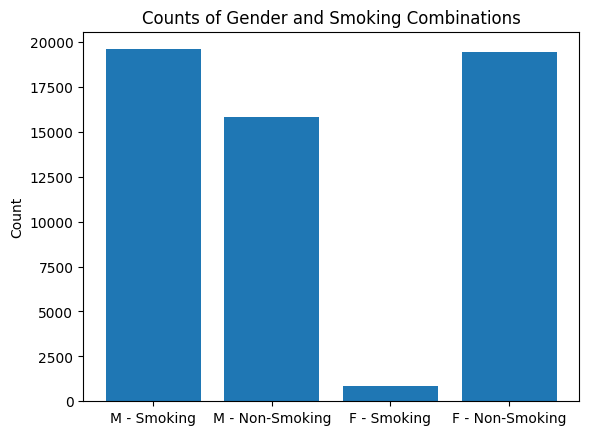

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('smoking.csv')

# Filter the DataFrame based on gender and smoking
male_smoking_1 = data[(data['gender'] == 'M') & (data['smoking'] == 1)]
male_smoking_0 = data[(data['gender'] == 'M') & (data['smoking'] == 0)]
female_smoking_1 = data[(data['gender'] == 'F') & (data['smoking'] == 1)]
female_smoking_0 = data[(data['gender'] == 'F') & (data['smoking'] == 0)]

# Count the occurrences
counts = [len(male_smoking_1), len(male_smoking_0), len(female_smoking_1), len(female_smoking_0)]

# Define the labels for the bars
labels = ['M - Smoking', 'M - Non-Smoking', 'F - Smoking', 'F - Non-Smoking']

# Create a bar chart
plt.bar(labels, counts)

# Add labels and title
plt.ylabel('Count')
plt.title('Counts of Gender and Smoking Combinations')

# Show the plot
plt.show()

Now let us see what are the values calculated by the library functions:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv('smoking.csv')

# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['smoking'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Define the significance level (alpha)
alpha = 0.05

# Determine whether to accept or reject the null hypothesis
if p < alpha:
    result = "Reject the null hypothesis (There is a significant relationship)"
    print(result)
else:
    result = "Accept the null hypothesis (No significant relationship)"
    print(result)

Chi-square statistic: 14502.590888863075
P-value: 0.0
Degrees of freedom: 1
Reject the null hypothesis (There is a significant relationship)


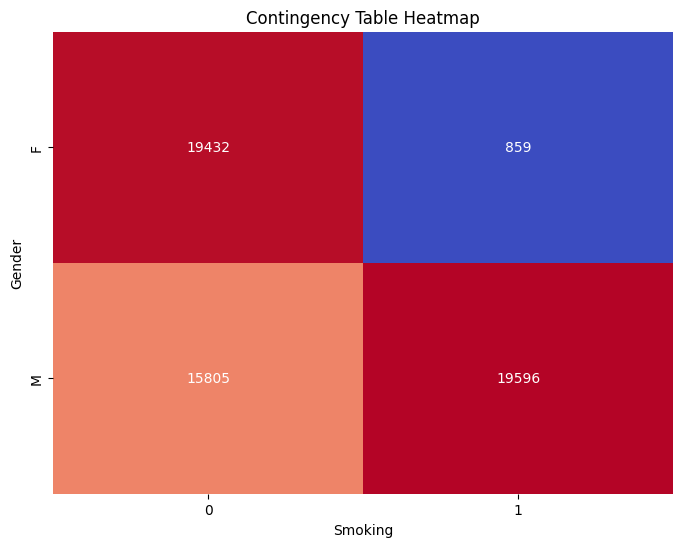

In [ ]:
import seaborn as sns
# Create a heatmap to visualize the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Contingency Table Heatmap")
plt.xlabel("Smoking")
plt.ylabel("Gender")
plt.show()